In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)

In [7]:
# Loading data
df = pd.read_csv('application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
# Checking size of application and previous data:
print("application_data shape:",df.shape)

application_data shape: (5789, 122)


In [9]:
#To check datatypes of columns
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED              

In [10]:
#Checking the percentage of missing null values
round(df.isnull().mean()*100,2).sort_values(ascending=False)

COMMONAREA_AVG                  68.92
COMMONAREA_MODE                 68.92
COMMONAREA_MEDI                 68.92
NONLIVINGAPARTMENTS_MODE        68.58
NONLIVINGAPARTMENTS_AVG         68.58
NONLIVINGAPARTMENTS_MEDI        68.58
LIVINGAPARTMENTS_AVG            67.56
LIVINGAPARTMENTS_MODE           67.56
LIVINGAPARTMENTS_MEDI           67.56
FONDKAPREMONT_MODE              67.35
FLOORSMIN_AVG                   66.89
FLOORSMIN_MEDI                  66.89
FLOORSMIN_MODE                  66.89
OWN_CAR_AGE                     66.13
YEARS_BUILD_AVG                 65.31
YEARS_BUILD_MEDI                65.31
YEARS_BUILD_MODE                65.31
LANDAREA_MEDI                   58.30
LANDAREA_MODE                   58.30
LANDAREA_AVG                    58.30
BASEMENTAREA_MODE               57.59
BASEMENTAREA_AVG                57.59
BASEMENTAREA_MEDI               57.59
EXT_SOURCE_1                    56.35
NONLIVINGAREA_MEDI              53.83
NONLIVINGAREA_MODE              53.81
NONLIVINGARE

 **Observed Imputation on Null Values:-**

1. Missing values having greater than 50% values must be removed.
2. Missing values less than 50% are numerical columns. So we can impute them with median or mean.
3. Missing values in Occupation type should be impute with categorical value 'Others'.

In [11]:
#Removing columns whose percentage of missing values is greater than equal to 50
df = df.loc[:,(df.isnull().mean()*100) <= 50.00]

In [12]:
#shape of dataframe after removing high% null columns
df.shape

(5789, 92)

In [111]:
#Adding all document types and retaining only the sum column
df['NUM_DOCS'] = df['FLAG_DOCUMENT_2'] + df['FLAG_DOCUMENT_3'] + df['FLAG_DOCUMENT_4'] + df['FLAG_DOCUMENT_5']
+ df['FLAG_DOCUMENT_6'] + df['FLAG_DOCUMENT_7'] + df['FLAG_DOCUMENT_8'] + df['FLAG_DOCUMENT_9'] + df['FLAG_DOCUMENT_10']
+ df['FLAG_DOCUMENT_11'] + df['FLAG_DOCUMENT_12'] + df['FLAG_DOCUMENT_13'] + df['FLAG_DOCUMENT_14'] + df['FLAG_DOCUMENT_15']
+ df['FLAG_DOCUMENT_16'] + df['FLAG_DOCUMENT_17'] + df['FLAG_DOCUMENT_18'] + df['FLAG_DOCUMENT_19'] + df['FLAG_DOCUMENT_20']
+ df['FLAG_DOCUMENT_21']

KeyError: ignored

In [14]:
#Deleting extra columns after merging all these columns in above query
df.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
            'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',
            'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
            'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'],axis=1,inplace=True)

In [15]:
# Structure of dataframe after deleting extra columns
df.shape

(5789, 73)

In [16]:
#check numerical columns
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NUM_DOCS
count,5789.000000,5789.000000,5789.000000,5.789000e+03,5.789000e+03,5789.000000,5.788000e+03,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000,5789.0,5789.000000,5789.00000,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000,5789.00000,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000,5789.000000,5773.000000,4661.000000,2897.000000,3010.000000,2938.000000,2975.000000,2937.000000,2897.000000,3010.000000,2938.000000,2975.000000,2937.000000,2897.000000,3010.000000,2938.000000,2975.000000,2936.000000,3048.000000,5764.000000,5764.000000,5764.000000,5764.000000,5788.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5010.000000,5788.000000
mean,103382.811194,0.077388,0.409052,1.674310e+05,5.964398e+05,26963.432544,5.365435e+05,0.020956,-16036.983762,64291.327345,-4961.976507,-2971.974607,1.0,0.818622,0.19848,0.998100,0.280187,0.055795,2.144066,2.048022,2.02712,12.062014,0.017792,0.049404,0.037312,0.085334,0.235792,0.177060,0.514081,0.511206,0.117446,0.978850,0.150512,0.226504,0.108426,0.113528,0.977416,0.146142,0.222516,0.106387,0.118175,0.978959,0.150302,0.226228,0.110114,0.101968,1.397120,0.148161,1.383067,0.103053,-958.798030,0.008383,0.009381,0.036327,0.268663,0.276048,1.880040,0.722702
std,1955.892221,0.267229,0.712142,9.641043e+04,4.028999e+05,14379.329523,3.700715e+05,0.014046,4325.376169,141687.944890,3536.679742,1526.901798,0.0,0.385365,0.39889,0.043553,0.449129,0.229546,0.901493,0.509524,0.50477,3.221460,0.132207,0.216729,0.189542,0.279403,0.424529,0.381752,0.190514,0.196338,0.107809,0.046858,0.099681,0.148666,0.112595,0.105492,0.062411,0.100142,0.147492,0.112619,0.108812,0.047972,0.099901,0.149130,0.114731,0.107348,2.254576,0.456976,2.233319,0.374158,822.540698,0.093348,0.134459,0.205431,0.927431,0.621891,1.854398,0.447703
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2596.500000,4.500000e+04,0.000938,-25160.000000,-15632.000000,-20981.000000,-6228.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000074,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3882.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101702.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16389.000000,2.385000e+05,0.010006,-19594.000000,-2800.000000,-7443.000000,-4305.000000,1.0,1.000000,0.00000,1.000000,0.000000,0.000000,2.000000,2.000000,2.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.391426,0.374021,0.058800,0.976700,0.069000,0.166700,0.047100,0.051500,0.976700,0.069000,0.166700,0.044700,0.058300,0.976700,0.069000,0.166700,0.047875,0.042275,0.000000,0.000000,0.000000,0.000000,-1550.000000,0.000000,0.000000,0.000000,0.

In [17]:
# Changing all negative values. 
df.DAYS_BIRTH = df.DAYS_BIRTH.abs()
df.DAYS_EMPLOYED = df.DAYS_EMPLOYED.abs()
df.DAYS_REGISTRATION = df.DAYS_REGISTRATION.abs()
df.DAYS_ID_PUBLISH = df.DAYS_ID_PUBLISH.abs()
df.DAYS_LAST_PHONE_CHANGE = df.DAYS_LAST_PHONE_CHANGE.abs()

In [18]:
# Changing relevant days counted features to years to observe some statistics about them. (Only 2 at the moment(!))
df['AGE'] = df['DAYS_BIRTH'] // 365
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'] // 365 

In [19]:
# Deleting DAYS_EMPLOYED and DAYS_BIRTH columns
df.drop(['DAYS_BIRTH','DAYS_EMPLOYED'],axis=1,inplace = True)

In [20]:
#Checking imbalance percentage
df.TARGET.value_counts(normalize=True)*100

0    92.261185
1     7.738815
Name: TARGET, dtype: float64

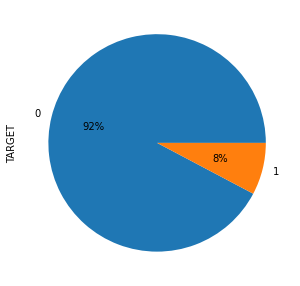

In [21]:
# pie chart of Target
plt.figure(figsize=(5,5))
df.TARGET.value_counts(normalize=True).plot.pie(autopct='%1.0f%%')
plt.show()

In [22]:
df.AMT_INCOME_TOTAL.describe()

count    5.789000e+03
mean     1.674310e+05
std      9.641043e+04
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.935000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [23]:
#Converting income amount into Lakhs
df.AMT_INCOME_TOTAL = df.AMT_INCOME_TOTAL/100000
df.AMT_CREDIT = df.AMT_CREDIT/100000

# BINNING

INCOME_TOTAL

In [24]:
#Dividing total income into bins as Incomeslab
df['IncomeSlab'] = pd.cut(df.AMT_INCOME_TOTAL, bins=[0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 5.0], labels = ['0.25-0.75','0.75-1.25','1.25-1.75','1.75-2.25','2.25-2.75','2.75-3.25','3.25-3.75','3.75-4.25','4.25+'])

AGE

In [25]:
#Changing Age into categorical column by dividing it into bins as age_buckets.
age_buckets = ['<30','30-40','40-50','50-60','60+']
df['AGE_GROUP'] = pd.cut(df.AGE, [0,30,40,50,60,999], labels=age_buckets)
df['AGE_GROUP'].value_counts(normalize=True)*100

30-40    27.034030
40-50    25.133875
50-60    21.748143
<30      16.617723
60+       9.466229
Name: AGE_GROUP, dtype: float64

# Dividing dataframe into two categories according to target values 1 and 0 (Defaulters and Non-Defaulters)

In [26]:
#Dividing dataframe into two dataframes on basis of Target variable
non_defaulters = df[df['TARGET'] == 0]
defaulters = df[df['TARGET'] == 1]

Analysis according to dataframes - non_defaulters & defaulters

In [27]:
#Function for percentage calculator
def percent_calc(df,ax):
  total = float(len(df))
  for i in ax.patches:
      percent = '{:.1f}%'.format(100*i.get_height()/total)
      x = i.get_x() + i.get_width()
      y = i.get_height()
      ax.annotate(percent, (x,y), ha='right')

# **Univariate Analysis (Categorical)**

**Gender**

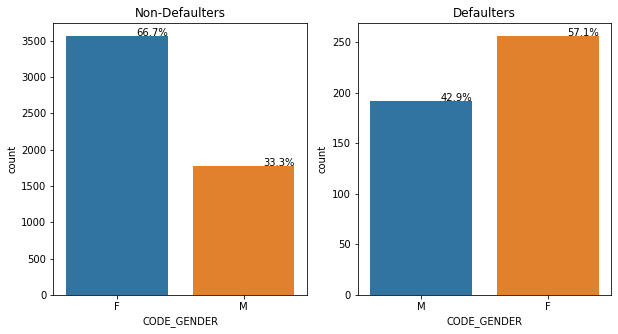

In [28]:
# Counplot for CODE_GENDER 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Non-Defaulters')
ax = sns.countplot(x='CODE_GENDER',data=non_defaulters)
percent_calc(non_defaulters,ax)

plt.subplot(1,2,2)
plt.title('Defaulters')
ax = sns.countplot(x='CODE_GENDER',data=defaulters)
percent_calc(defaulters,ax)
plt.show()

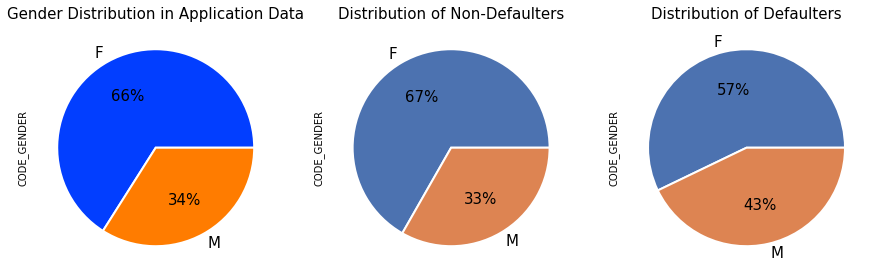

In [29]:
# Pie-chart to show how gender is distributed in non-defaulters and defaulters
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

for d in [
    {'df': df, 'ax': ax1, 'title': 'Gender Distribution in Application Data', 'cp': 'bright'},
    {'df': non_defaulters, 'ax': ax2, 'title': 'Distribution of Non-Defaulters', 'cp': 'deep'},
    {'df': defaulters, 'ax': ax3, 'title': 'Distribution of Defaulters', 'cp': 'deep'},
]:
    d['ax'].set_title(d['title'], fontsize=15)
    d['df']["CODE_GENDER"].value_counts().plot.pie(
        ax=d['ax'], autopct="%1.0f%%", fontsize=15, figsize=(15,8),
        colors=sns.color_palette(d['cp']),
        wedgeprops={"linewidth":2,"edgecolor":"white"},shadow=False
    )

Insights -
Distribution of non-defaulters are almost same as original data frame.
But 
Distribution of defaulters are different. Percentage gap between genders is smaller. Only 1% difference is creating a big differencce in case of defaulters

**Age-Group**

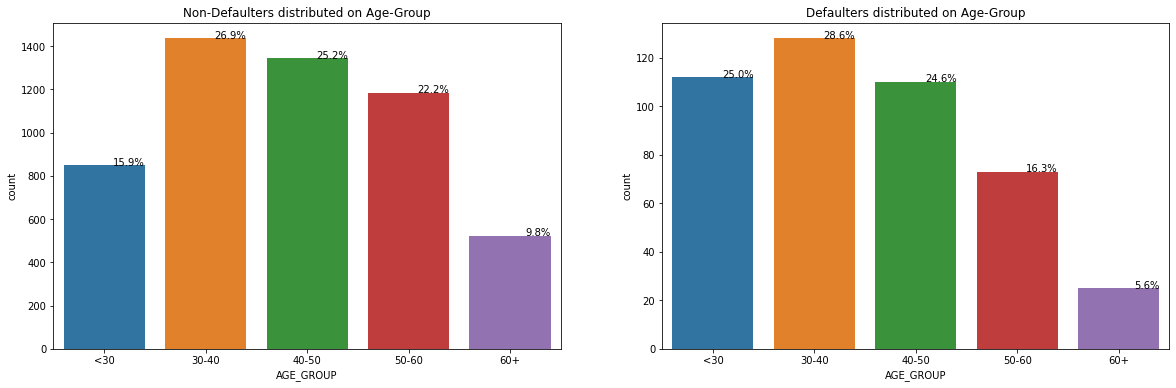

In [30]:
# Countplot to show how age groups are distributed
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
ax = sns.countplot(non_defaulters['AGE_GROUP'])
plt.title('Non-Defaulters distributed on Age-Group')
percent_calc(non_defaulters,ax)

plt.subplot(1,2,2)
ax = sns.countplot(defaulters['AGE_GROUP'])
plt.title('Defaulters distributed on Age-Group')
percent_calc(defaulters,ax)
plt.show()

Insight - Defaulters percentage is more than Non-Defaulters in every age group except 60+, means senior citizens are more trustable.

**Income-Type**

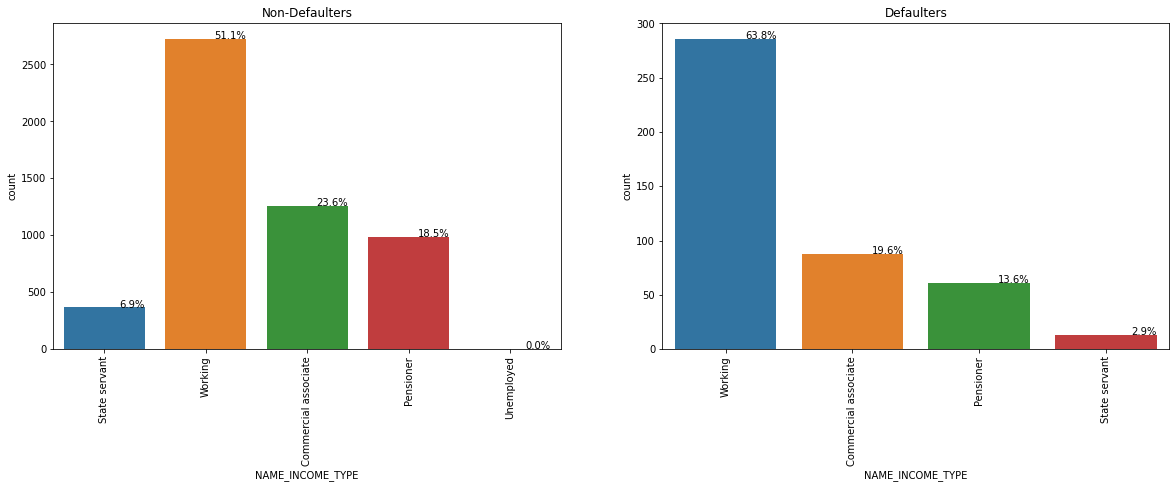

In [31]:
#Countplot for Income type column 
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Non-Defaulters')
ax = sns.countplot(x='NAME_INCOME_TYPE',data=non_defaulters)
plt.xticks(rotation=90)
percent_calc(non_defaulters,ax)

plt.subplot(1,2,2)
plt.title('Defaulters')
ax = sns.countplot(x='NAME_INCOME_TYPE',data=defaulters)
plt.xticks(rotation=90)
percent_calc(defaulters,ax)
plt.show()

Insights -
Working people take more loans but their defaulters percentage is also more.
But Commercial Associate, Pensioner and State-servant are more on Non-Defaulters side.

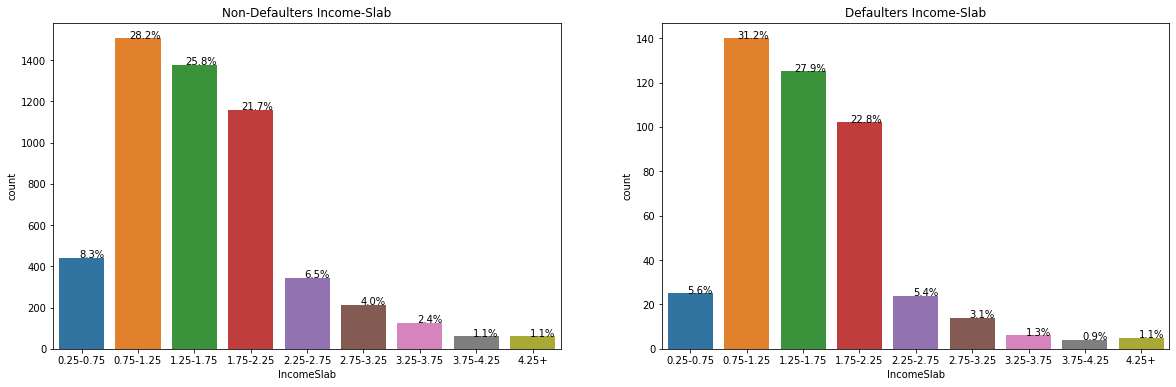

In [32]:
#Plotting count plot for target dataframes vs incomeslab
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
ax = sns.countplot(non_defaulters.IncomeSlab)
plt.title("Non-Defaulters Income-Slab")
percent_calc(non_defaulters,ax)

plt.subplot(1,2,2)
ax = sns.countplot(defaulters.IncomeSlab)
plt.title("Defaulters Income-Slab")
percent_calc(defaulters,ax)
plt.show()

Insight - 

Applicants having IncomeSlab of 0.75-1.25LPA have most number of repayers and defaulters

**Family-Status**

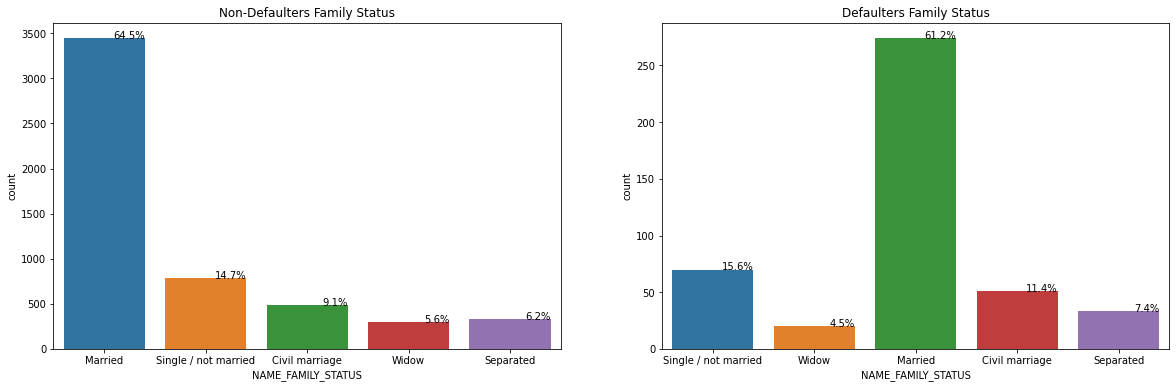

In [33]:
#Countplot for Family status
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
ax = sns.countplot(non_defaulters.NAME_FAMILY_STATUS)
plt.title("Non-Defaulters Family Status")
percent_calc(non_defaulters,ax)

plt.subplot(1,2,2)
ax = sns.countplot(defaulters.NAME_FAMILY_STATUS)
plt.title("Defaulters Family Status")
percent_calc(defaulters,ax)
plt.show()

Insights -

1. Married non-defaulters have percentage are more than defaulters.
2. Singles and Civil marriages are more on defaulters side
3. Seperated have equal percentage.
4. Widows are more on non-defaulters side.


**Education Type**

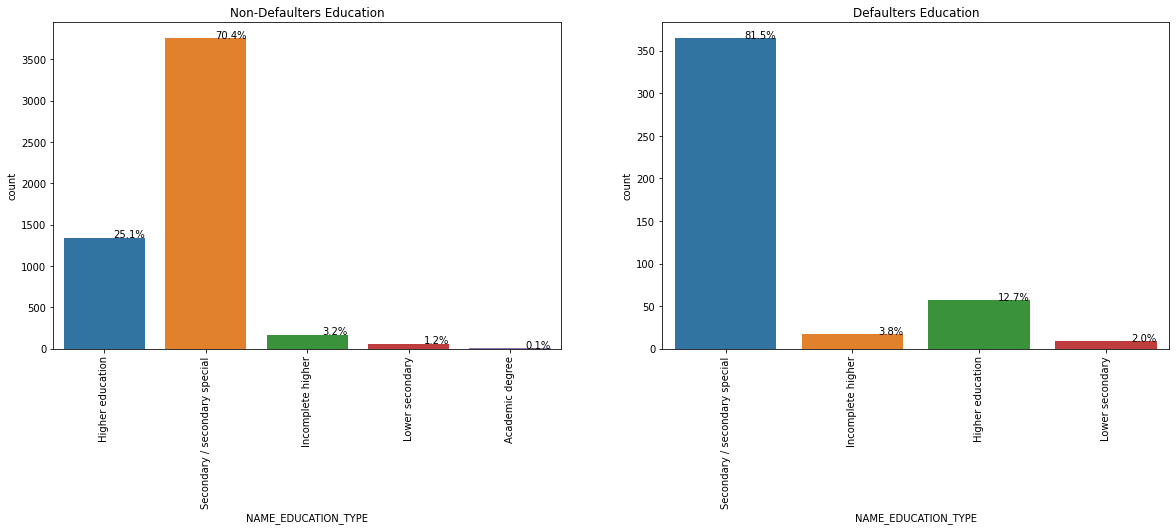

In [34]:
# Countplot to show how Education type related to defaulters and non-defaulters.
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
ax = sns.countplot(non_defaulters.NAME_EDUCATION_TYPE)
plt.title("Non-Defaulters Education")
plt.xticks(rotation = 90)
percent_calc(non_defaulters,ax)

plt.subplot(1,2,2)
ax = sns.countplot(defaulters.NAME_EDUCATION_TYPE)
plt.title("Defaulters Education")
plt.xticks(rotation = 90)
percent_calc(defaulters,ax) 
plt.show()

Insights - 

1. Secondary Students need more loan for higher studies and are little more on defaulters side
2. Higher Education Students mostly non-defaulters
3. Incomplete Higher, Lower Secondary and Academic Degree Students have very little percentage compared to higher and secondary. They have almost same percentage for defaulters and non-defaulters.

**Occupation Type**

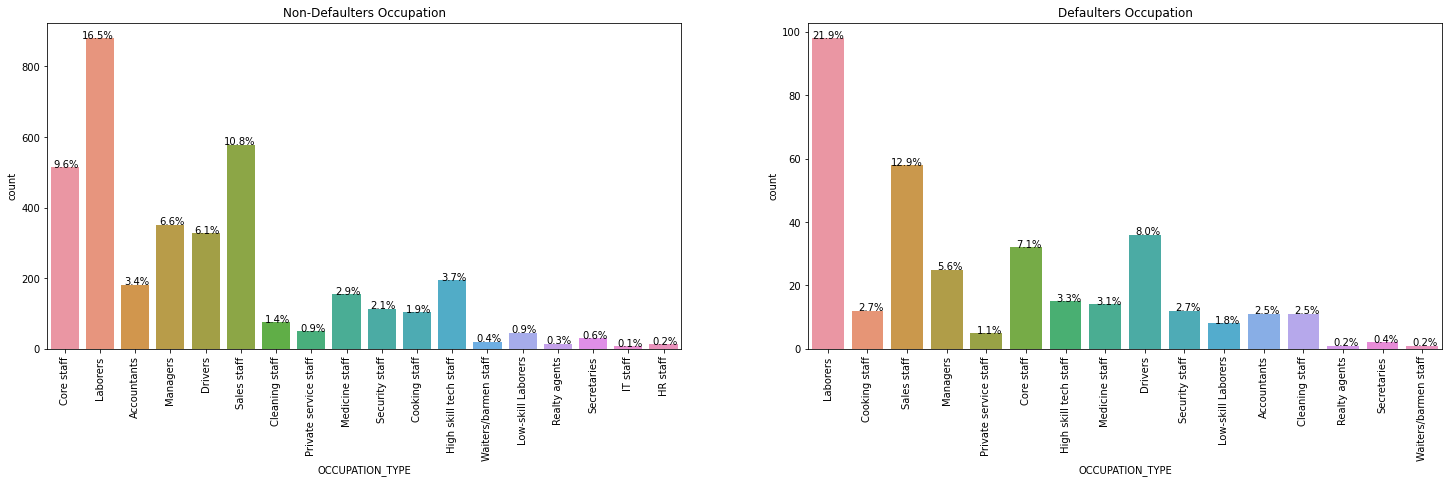

In [35]:
# Countplot to show how occupation related with non-defaulters and defaulters
plt.figure(figsize=[25,6])
plt.subplot(1,2,1)
ax = sns.countplot(non_defaulters.OCCUPATION_TYPE)
plt.title("Non-Defaulters Occupation")
plt.xticks(rotation=90)
percent_calc(non_defaulters,ax)

plt.subplot(1,2,2)
ax = sns.countplot(defaulters.OCCUPATION_TYPE)
plt.title("Defaulters Occupation")
plt.xticks(rotation=90)
percent_calc(defaulters,ax)
plt.show()

Insights -

1. Laborers are more Defaulters.
2. Managers and Core staff are more on Non-Defaulters side.
3. High-skill tech staff is also more on non-defaulters side.
4. Drivers and Sales staff also little more on defaulters side.

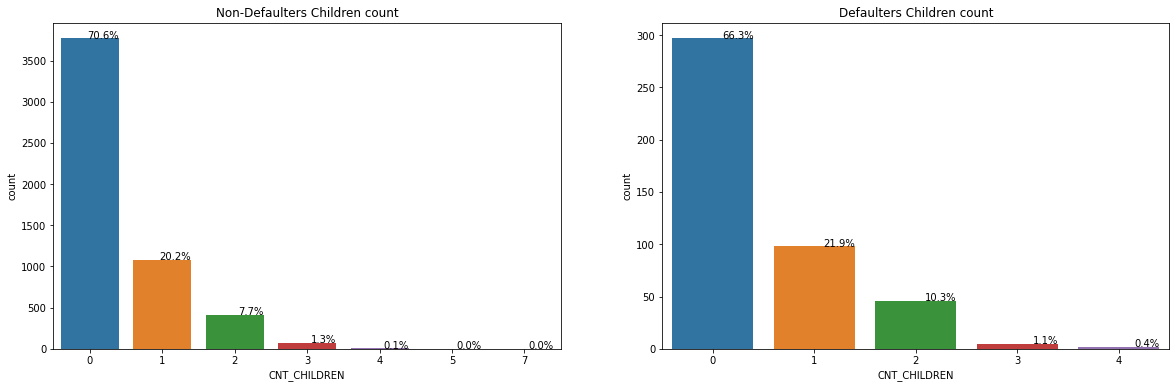

In [36]:
# Countplot to show how children count related with non-defaulters and defaulters
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
ax = sns.countplot(non_defaulters.CNT_CHILDREN)
plt.title("Non-Defaulters Children count")
percent_calc(non_defaulters,ax)

plt.subplot(1,2,2)
ax = sns.countplot(defaulters.CNT_CHILDREN)
plt.title("Defaulters Children count")
percent_calc(defaulters,ax)
plt.show()

# **Univariate Analysis (Numerical)**

**Annuity Amount**

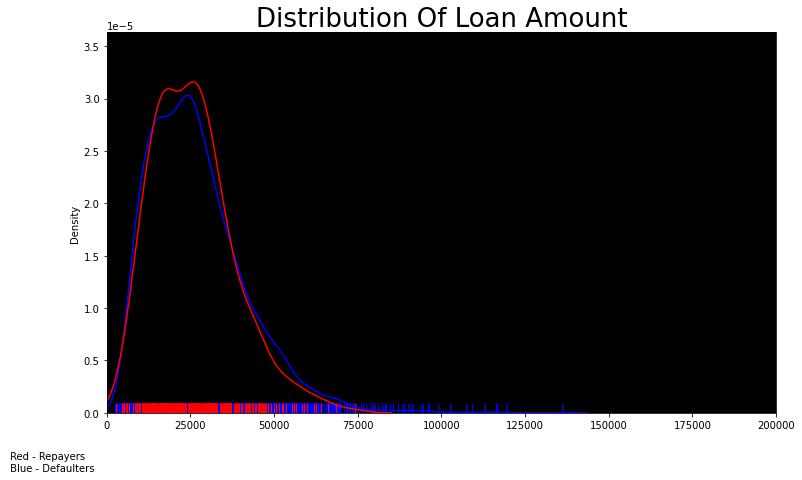

In [37]:
#Plotting distribution
txt = ' Red - Repayers\n Blue - Defaulters'
fig = plt.figure(figsize=(12,7))
yx = sns.distplot(non_defaulters[['AMT_ANNUITY']], hist=False, rug=True, color='b', bins=2000)
yx = sns.distplot(defaulters[['AMT_ANNUITY']], hist=False, rug=True, color='r', bins=2000)
plt.title('Distribution Of Loan Amount', fontdict={'fontsize':26} )
plt.xlim(0,200000)
fig.text(.01,.01,txt)
yx.set_facecolor("k")
fig.show()

Insights - 

Statistics says that - Higher loan amount applicants mostly are non-defaulters.

**Total Income**

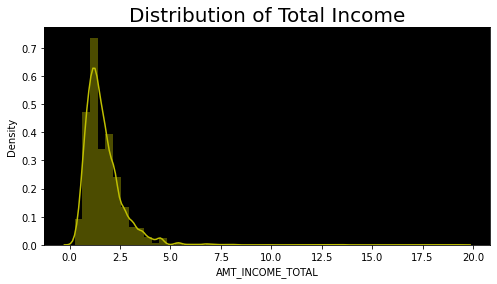

In [38]:
#Distplot to check how total income is distributed
plt.figure(figsize=(8,4))
ax = sns.distplot(df['AMT_INCOME_TOTAL'], color="y")
plt.title('Distribution of Total Income', fontdict={'fontsize':20} )
ax.set_facecolor("k")
plt.show()

# Outliers

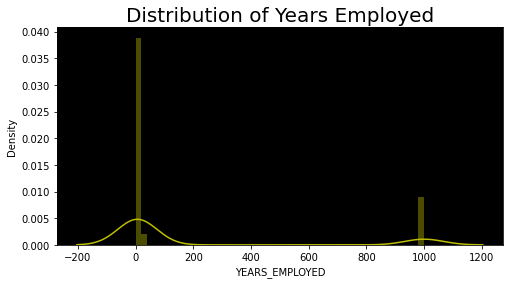

In [39]:
# Checking for outliers in Years Employed, as we observed before:
plt.figure(figsize=(8,4))
ax = sns.distplot(df['YEARS_EMPLOYED'], color="y")
plt.title('Distribution of Years Employed', fontdict={'fontsize':20} )
ax.set_facecolor("k")
plt.show()

Insights - 

Alot of data has 1000 years of working value. These are must be outliers. We should treat it.

**Let's check who are those**

In [40]:
df[df['YEARS_EMPLOYED'] > 900]['NAME_INCOME_TYPE'].unique()

array(['Pensioner', 'Unemployed'], dtype=object)


So, We have outliers from these two Income types -> Pensioner & Unemployed   

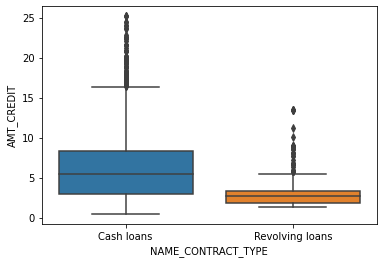

In [41]:
# Box plot to check outliers exist in which contract type
sns.boxplot(x ='NAME_CONTRACT_TYPE',y='AMT_CREDIT',data =df)

Insight - 

Cash Loans has large amount of outliers as compared to Revolving loans. So, it means credit amount taken by applicant in cash loan category are much higher.

#Bivariate Analysis(Categorical - Categorical)

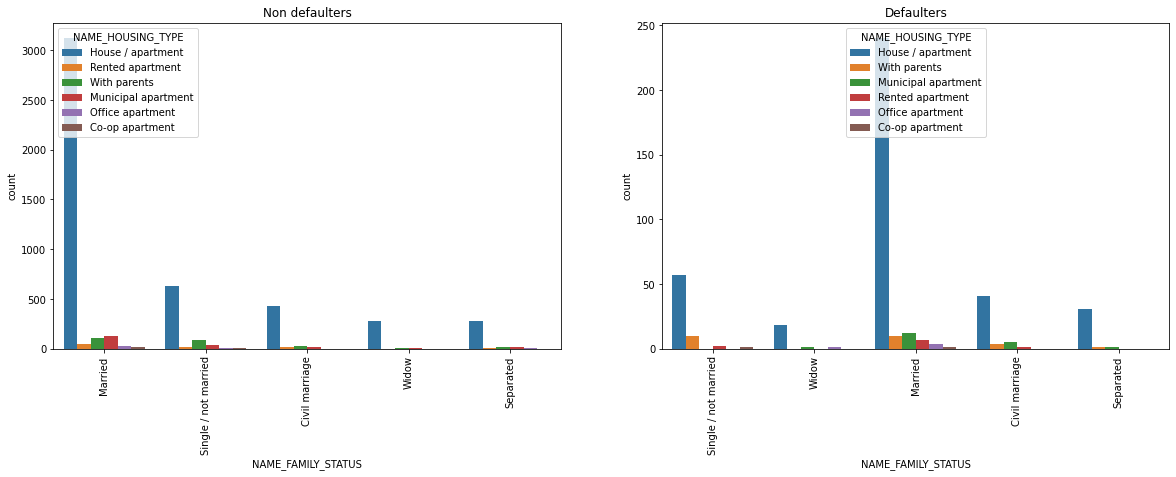

In [42]:
#Countplot for Family status and housing type
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.title('Non defaulters')
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',hue='NAME_HOUSING_TYPE', data = non_defaulters)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Defaulters')
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',hue='NAME_HOUSING_TYPE', data = defaulters)
plt.xticks(rotation=90)
plt.show()

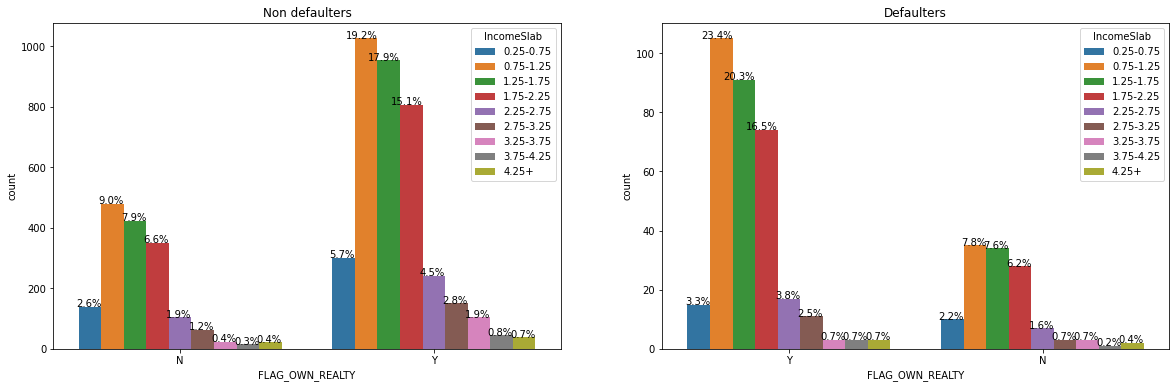

In [43]:
# Countplot for home owner and Income slab
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.title('Non defaulters')
ax = sns.countplot(x = 'FLAG_OWN_REALTY',hue='IncomeSlab', data = non_defaulters)
percent_calc(non_defaulters,ax)

plt.subplot(1,2,2)
plt.title('Defaulters')
ax = sns.countplot(x = 'FLAG_OWN_REALTY',hue='IncomeSlab', data = defaulters)
percent_calc(defaulters,ax)
plt.show()

Insight - 

1. Housing type, Marital status type follows similar trend
2. Flag_own_reality and income type -> income slab from 75000 to 1 lakh 25000 have same percentage of non_defaulters but on defaulters side they have little bit more percentage in the case either they have their own house or not.
3. Customers with Income slab between 25000 and 75000 are more non defaulters who have their own property.

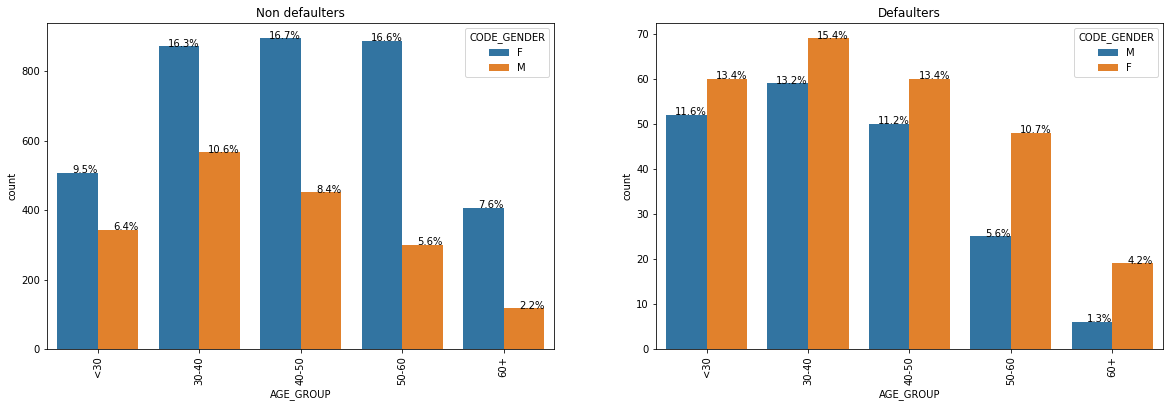

In [44]:
#Age group and gender

plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.title('Non defaulters')
ax = sns.countplot(x = 'AGE_GROUP',hue='CODE_GENDER', data = non_defaulters)
plt.xticks(rotation=90)
percent_calc(non_defaulters,ax)

plt.subplot(1,2,2)
plt.title('Defaulters')
ax = sns.countplot(x = 'AGE_GROUP',hue='CODE_GENDER', data = defaulters)
plt.xticks(rotation=90)
percent_calc(defaulters,ax)

plt.show()

Insights - 

1. Females in age group 30-40 are equivalent defaulters and non-defaulters.
2. Females in age group 40- 50, 50-60 and 60+ are more loyal than males.
3. Females less than 30 are ore on non-defaulters side.
4. Males in age group 30-40 are more on defaulters side.

# Bivariate Analysis (Numeric - Categorical)

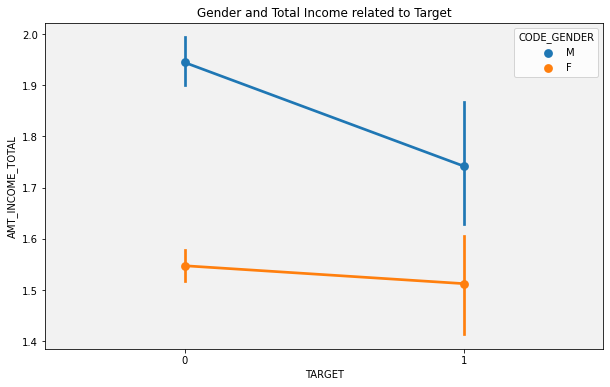

In [45]:
# Lets visuazlize some statitstics about genders and incomes:
plt.figure(figsize=(10,6))
ax = sns.pointplot(x='TARGET', y='AMT_INCOME_TOTAL', hue='CODE_GENDER', data=df)
plt.title('Gender and Total Income related to Target')
ax.set_facecolor("#f2f2f2")
plt.show()

Insights:

1. Men: In the transition from repayers to defaulters, average income is decreasing.
2. Women: In the transition from repayers to defaulters, average income increasing.

Insights:
Men: In the transition from repayers to defaulters, average income is decreasing.
Women: In the transition from repayers to defaulters, average income stays the same.

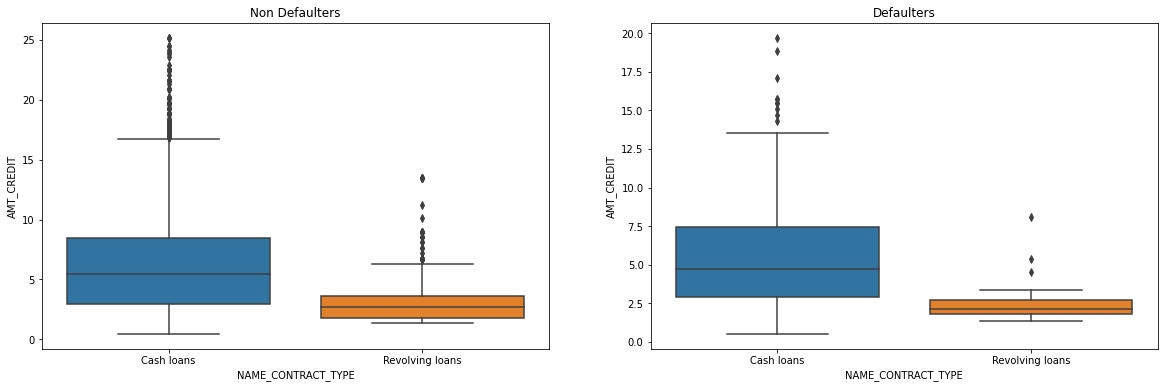

In [46]:
# Let's look for gender wise data
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Non Defaulters')
ax = sns.boxplot(x ='NAME_CONTRACT_TYPE',y='AMT_CREDIT',data =non_defaulters)

plt.subplot(1,2,2)
plt.title('Defaulters')
ax = sns.boxplot(x ='NAME_CONTRACT_TYPE',y='AMT_CREDIT',data = defaulters)

plt.show()

Insights - 

1. Cash loans have more credit than revolving loans
2. Cash loans and Revolving loans have similar credit amount in case of defaulters or non-defaulters.
3. Median for cash loans has same value for both defaulters and non-defaulters.
4. Median for Revolving loans in case of defaulters is not exactly visible but for non-defaulters it is almost same as 25th percentile of cash loans.   

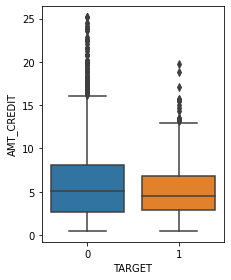

0.00     0.450000
0.25     2.700000
0.50     5.084955
0.75     8.086500
0.95    13.500000
0.99    18.856620
Name: AMT_CREDIT, dtype: float64


In [47]:
#Boxplot for Credit amount and target
sns.boxplot(df['AMT_CREDIT'])
plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'TARGET',y = 'AMT_CREDIT')
plt.tight_layout()
plt.show()
print(df['AMT_CREDIT'].quantile([0,0.25,0.5,0.75,0.95,0.99]))

Insight -

Non-Defaulters have higher IQR than Defaulters.

# Bivariate Analysis (Continuous - Continuous)

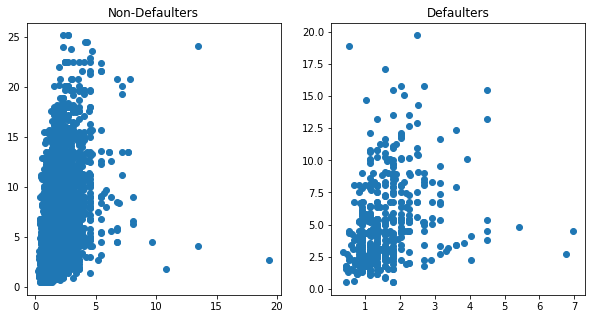

In [48]:
#Scatter plot for Total income and Credit amount
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Non-Defaulters')
plt.scatter(non_defaulters['AMT_INCOME_TOTAL'],non_defaulters['AMT_CREDIT'])

plt.subplot(1,2,2)
plt.title('Defaulters')
plt.scatter(defaulters['AMT_INCOME_TOTAL'],defaulters['AMT_CREDIT'])
plt.show()

Insight -

Most of the Non-Defaulters have low income and they take more credit amount.

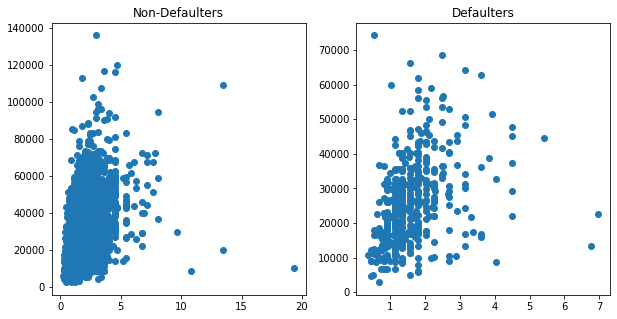

In [49]:
#Scatter plot for Total Income and Annuity amount
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Non-Defaulters')
plt.scatter(non_defaulters['AMT_INCOME_TOTAL'],non_defaulters['AMT_ANNUITY'])

plt.subplot(1,2,2)
plt.title('Defaulters')
plt.scatter(defaulters['AMT_INCOME_TOTAL'],defaulters['AMT_ANNUITY'])
plt.show()

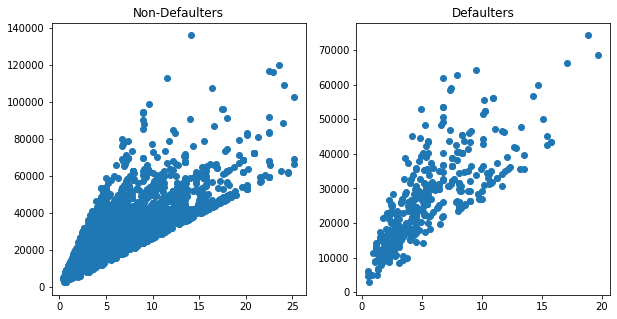

In [50]:
#Scatter plot for Credit amount and Annuity amount
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Non-Defaulters')
plt.scatter(non_defaulters['AMT_CREDIT'],non_defaulters['AMT_ANNUITY'])

plt.subplot(1,2,2)
plt.title('Defaulters')
plt.scatter(defaulters['AMT_CREDIT'],defaulters['AMT_ANNUITY'])
plt.show()

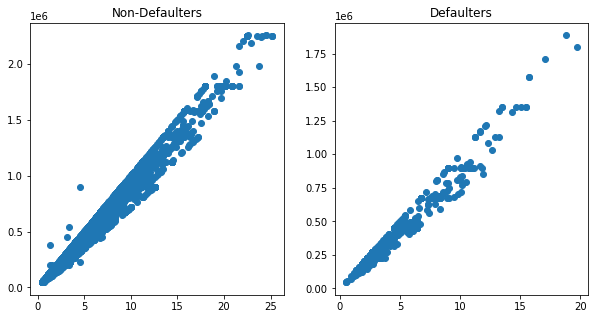

In [51]:
#Scatter plot for Credit amount and Goods Price
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Non-Defaulters')
plt.scatter(non_defaulters['AMT_CREDIT'],non_defaulters['AMT_GOODS_PRICE'])

plt.subplot(1,2,2)
plt.title('Defaulters')
plt.scatter(defaulters['AMT_CREDIT'],defaulters['AMT_GOODS_PRICE'])
plt.show()

Insights -

1. Credit amount and Annuity have linear relation for both defaulters and non-defaulters
2. Total income and Credit amount has spread in non-defaulters case but there is no relation between these two in defaulters case(because of spread near 0 value)
3. Total income and Annuity amount has spread in non-defaulters case but there is no relation between these two in defaulters case(because of spread near 0 value)
4. Credit amount has linear relation with Goods price.

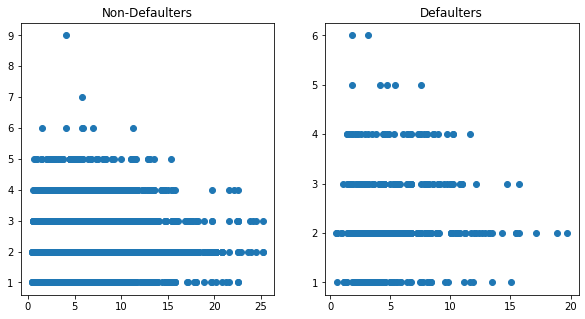

In [52]:
#Scatter plot for Credit amount and Family members count
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Non-Defaulters')
plt.scatter(non_defaulters['AMT_CREDIT'],non_defaulters['CNT_FAM_MEMBERS'])

plt.subplot(1,2,2)
plt.title('Defaulters')
plt.scatter(defaulters['AMT_CREDIT'],defaulters['CNT_FAM_MEMBERS'])
plt.show()

Insight - 

We can see that the density in the lower left corner is similar in both the case, so the people are equally likely to default if the family is small and the AMT_CREDIT is low. We can observe that larger families and people with larger AMT_CREDIT default less often

# Correlation

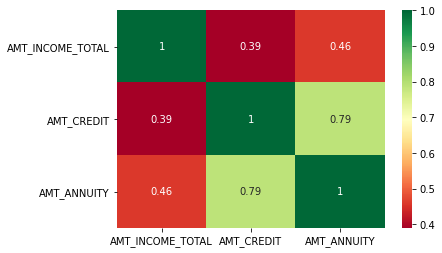

In [53]:
#Heat map to show Correlation between Annuity , Credit and Total Income
sns.heatmap(data=df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']].corr(),annot=True,cmap='RdYlGn')
plt.show()

Annuity amount is highly correlated with Credit amount

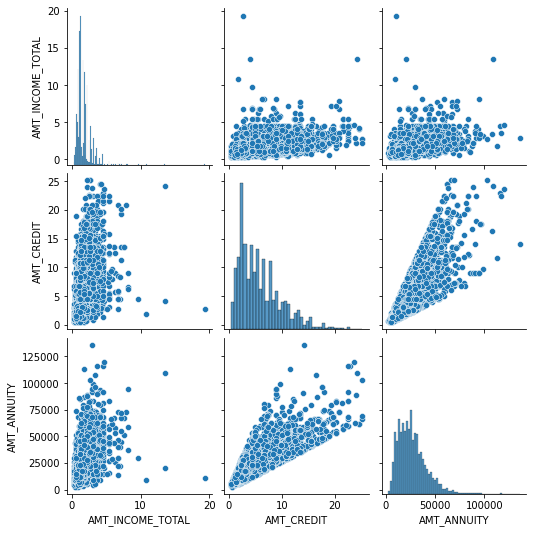

In [54]:
#Pair plot to check again the correlation between Total Income, Credit Amount, Annuity Amount.
sns.pairplot(data=df,vars=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY'])
plt.show()

This pairplot is also showing the linear relation between these two(AMT_CREDIT and AMT_ANNUITY)

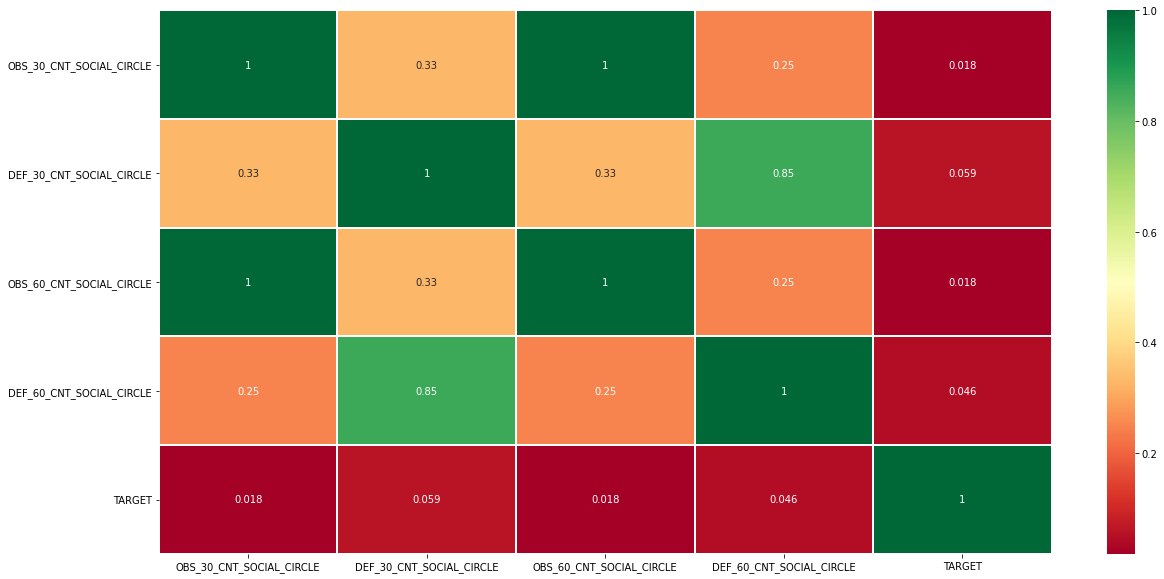

In [55]:
# Checking correlation between more unclear columns to "TARGET" feature in order to delete these fatures if they're uncorrelated.
obs_before_app = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'TARGET']
doc_corr = df[obs_before_app].corr()
fig = plt.figure(figsize=(20,10))
ax = sns.heatmap(doc_corr,
            xticklabels=doc_corr.columns,
            yticklabels=doc_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

Insight -

No correlation between features to TARGET

# Getting the top 10 correlation

In [56]:
#Getting the top 10 correlation
corr=df.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
3317,YEARS_EMPLOYED,FLAG_EMP_PHONE,-0.999888,0.999888
2232,APARTMENTS_MEDI,APARTMENTS_AVG,0.998717,0.998717
2712,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998600,0.998600
2468,LIVINGAREA_MEDI,LIVINGAREA_AVG,0.998410,0.998410
2350,ENTRANCES_MEDI,ENTRANCES_AVG,0.998330,0.998330
2409,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997944,0.997944
2414,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.989751,0.989751
2119,FLOORSMAX_MODE,FLOORSMAX_AVG,0.987866,0.987866
352,AMT_GOODS_PRICE,AMT_CREDIT,0.986803,0.986803
2355,ENTRANCES_MEDI,ENTRANCES_MODE,0.977991,0.977991


# **Analyzing Previous application**

In [57]:
prev_df=pd.read_csv('previous_application.csv')
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


We can use the previous applications to understand whether an applicant is new or not. If an applicant is a returing one, we can use the data to understand information like whether the previous one was a successful or failure, and why.In case of rejection, What is the reason of rejection. If successful, is the loan over or not, was there any due or not

In [58]:
# Let's see the structure of previous data
prev_df.shape

(12784, 37)

In [59]:
# Look into datatypes of column variables
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12784 entries, 0 to 12783
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   12784 non-null  int64  
 1   SK_ID_CURR                   12784 non-null  int64  
 2   NAME_CONTRACT_TYPE           12784 non-null  object 
 3   AMT_ANNUITY                  10125 non-null  float64
 4   AMT_APPLICATION              12784 non-null  float64
 5   AMT_CREDIT                   12784 non-null  float64
 6   AMT_DOWN_PAYMENT             6379 non-null   float64
 7   AMT_GOODS_PRICE              10086 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   12784 non-null  object 
 9   HOUR_APPR_PROCESS_START      12784 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  12784 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       12784 non-null  int64  
 12  RATE_DOWN_PAYMENT            6379 non-null   float64
 13  RATE_INTEREST_PR

In [60]:
#Checking the percentage of missing null values
round(prev_df.isnull().mean()*100,2).sort_values(ascending=False)

RATE_INTEREST_PRIMARY          99.61
RATE_INTEREST_PRIVILEGED       99.61
RATE_DOWN_PAYMENT              50.10
AMT_DOWN_PAYMENT               50.10
NAME_TYPE_SUITE                48.59
DAYS_TERMINATION               38.37
NFLAG_INSURED_ON_APPROVAL      38.37
DAYS_LAST_DUE                  38.37
DAYS_LAST_DUE_1ST_VERSION      38.37
DAYS_FIRST_DUE                 38.37
DAYS_FIRST_DRAWING             38.37
AMT_GOODS_PRICE                21.10
CNT_PAYMENT                    20.81
AMT_ANNUITY                    20.80
PRODUCT_COMBINATION             0.02
NAME_YIELD_GROUP                0.01
SELLERPLACE_AREA                0.01
NAME_SELLER_INDUSTRY            0.01
AMT_CREDIT                      0.00
AMT_APPLICATION                 0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
SK_ID_CURR                      0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
NAME_CONTRACT_TYPE              0.00
NAME_PAYMENT_TYPE               0.00
NFLAG_LAST_APPL_IN_DAY          0.00
N

In [61]:
#Removing columns whose percentage of missing values is greater than equal to 50
prev_df = prev_df.loc[:,(prev_df.isnull().mean()*100) <= 50.00]

In [62]:
#Shape after deletion
prev_df.shape

(12784, 33)

In [64]:
# Look into numerical columns
prev_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.278400e+04,12784.000000,10125.000000,1.278400e+04,1.278400e+04,1.008600e+04,12784.000000,12784.000000,12784.000000,1.278300e+04,10124.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000
mean,1.920451e+06,278658.039190,15238.415711,1.675338e+05,1.877134e+05,2.124160e+05,12.514549,0.997028,-896.974578,6.412467e+02,15.565389,344608.980074,14474.203071,31221.079832,76070.480391,81148.685874,0.318315
std,5.357992e+05,102589.513427,13936.557390,2.778395e+05,3.050895e+05,2.972270e+05,3.339382,0.054441,786.762193,3.540211e+04,13.975196,84442.623184,73925.508275,103245.730375,149297.052789,152763.951159,0.465852
min,1.000009e+06,100009.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,-2922.000000,-1.000000e+00,0.000000,-2889.000000,-2891.000000,-2798.000000,-2829.000000,-2789.000000,0.000000
25%,1.458055e+06,190413.000000,6141.015000,2.253038e+04,2.669512e+04,4.950000e+04,10.000000,1.000000,-1338.000000,-1.000000e+00,6.000000,365243.000000,-1620.000000,-1265.500000,-1325.500000,-1282.000000,0.000000
50%,1.914598e+06,276225.500000,10786.410000,7.195500e+04,7.948908e+04,1.027800e+05,12.000000,1.000000,-594.000000,1.200000e+01,12.000000,365243.000000,-806.000000,-363.000000,-531.000000,-495.000000,0.000000
75%,2.386877e+06,368882.000000,19519.875000,1.800000e+05,1.971450e+05,2.250000e+05,15.000000,1.000000,-293.000000,1.000000e+02,18.000000,365243.000000,-401.000000,113.500000,-69.000000,-44.000000,1.000000
max,2.845367e+06,456254.000000,204635.790000,2.925000e+06,3.020760e+06,2.925000e+06,22.000000,1.000000,-2.000000,4.000000e+06,60.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# **UNIVARIATE ANALYSIS (CATEGORICAL)**

In [65]:
prev_df.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved        63.696809
Refused         17.803504
Canceled        16.841364
Unused offer     1.658323
Name: NAME_CONTRACT_STATUS, dtype: float64

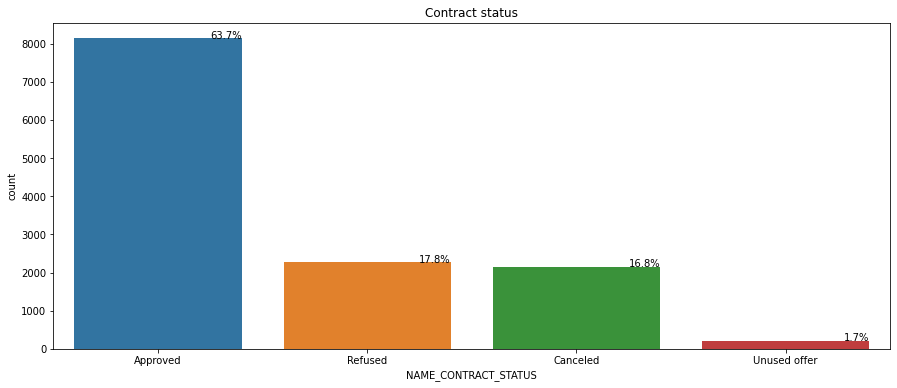

In [66]:
# Countplot for Contract Status
plt.figure(figsize=(15,6))
plt.title('Contract status')
ax = sns.countplot(prev_df['NAME_CONTRACT_STATUS'])
percent_calc(prev_df,ax)
plt.show()

Insights -

Previous application has higher %age of Approved applications.

In [67]:
prev_df.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100

Consumer loans     47.246558
Cash loans         41.395494
Revolving loans    11.342303
XNA                 0.015645
Name: NAME_CONTRACT_TYPE, dtype: float64

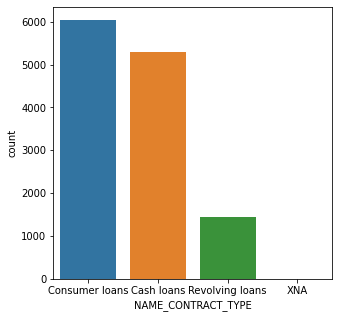

In [68]:
# Countplot for Contract Type
plt.figure(figsize=(5,5))
sns.countplot(prev_df['NAME_CONTRACT_TYPE'])
plt.show()

Insight -
Applicant are more directed towards Consumer loans compared to others.

In [69]:
prev_df.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True)*100

FRIDAY       15.777534
WEDNESDAY    15.362954
THURSDAY     14.823217
MONDAY       14.768461
SATURDAY     14.565081
TUESDAY      14.369524
SUNDAY       10.333229
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

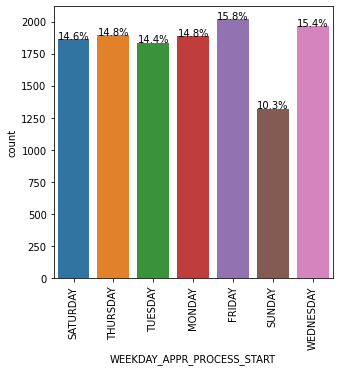

In [70]:
# Countplot for Weekday customer applied for loan
plt.figure(figsize=(5,5))
ax = sns.countplot(prev_df['WEEKDAY_APPR_PROCESS_START'])
plt.xticks(rotation=90)
percent_calc(prev_df,ax)
plt.show() 

Insight - Loans are mostly applied on Fridays.

In [71]:
prev_df.CHANNEL_TYPE.value_counts(normalize=True)*100

Credit and cash offices       41.974343
Country-wide                  31.946183
Stone                         13.994055
Regional / Local               6.891427
AP+ (Cash loan)                3.379224
Contact center                 1.306320
Channel of corporate sales     0.469337
Car dealer                     0.031289
R                              0.007822
Name: CHANNEL_TYPE, dtype: float64

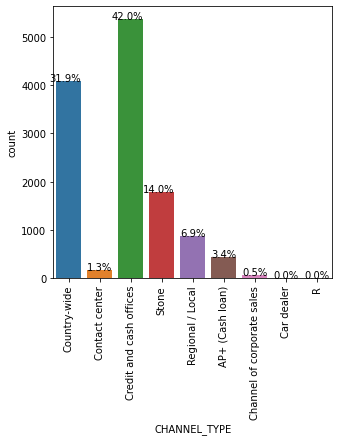

In [72]:
# Countplot for From where or from which channel we acquired the client 
plt.figure(figsize=(5,5))
ax = sns.countplot(prev_df['CHANNEL_TYPE'])
plt.xticks(rotation=90)
percent_calc(prev_df,ax)
plt.show()

Insight - We get clients from Country-wide and Credit & Cash offices mostly 

In [73]:
prev_df.CODE_REJECT_REASON.value_counts(normalize=True)*100

XAP       80.538173
HC        10.685232
LIMIT      3.559136
SCO        2.370150
CLIENT     1.658323
SCOFR      0.688360
XNA        0.336358
VERIF      0.164268
Name: CODE_REJECT_REASON, dtype: float64

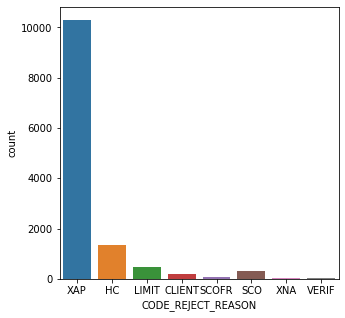

In [74]:
# Countplot for previous application Reject reason 
plt.figure(figsize=(5,5))
sns.countplot(prev_df['CODE_REJECT_REASON'])
# plt.xticks(rotation=90)
plt.show()

In [75]:
prev_df.FLAG_LAST_APPL_PER_CONTRACT.value_counts(normalize=True)

Y    0.995385
N    0.004615
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

We need only the data or applications that are applied previously

In [76]:
prev_df_applied = prev_df[prev_df.FLAG_LAST_APPL_PER_CONTRACT == 'Y']
prev_df_notApplied = prev_df[prev_df.FLAG_LAST_APPL_PER_CONTRACT == 'N']

# **Univariate Analysis (Continous)**

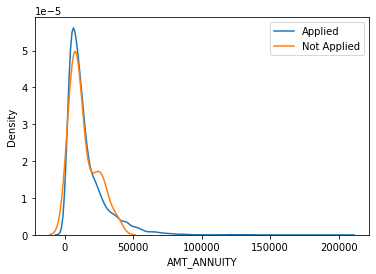

In [77]:
#Distplot for Annuity amount
sns.distplot(prev_df_applied['AMT_ANNUITY'],hist=False,label='Applied')
sns.distplot(prev_df_notApplied['AMT_ANNUITY'],hist=False,label='Not Applied')
plt.legend()
plt.show()

Insight - Those who applied previously has high Annuity amount.

# Extracting columns which are required

In [78]:
previous_app = prev_df[['SK_ID_CURR', 'AMT_CREDIT', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON', 'NAME_YIELD_GROUP', 'DAYS_TERMINATION','NAME_CONTRACT_TYPE','AMT_ANNUITY',
                        'AMT_GOODS_PRICE','NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']]
previous_app.head()

,SK_ID_CURR,AMT_CREDIT,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_YIELD_GROUP,DAYS_TERMINATION,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START
0,271877,17145.0,Approved,XAP,middle,-37.0,Consumer loans,1730.430,17145.0,NaN,SATURDAY,15
1,108129,679671.0,Approved,XAP,low_action,365243.0,Cash loans,25188.615,607500.0,Unaccompanied,THURSDAY,11
2,122040,136444.5,Approved,XAP,high,365243.0,Cash loans,15060.735,112500.0,"Spouse, partner",TUESDAY,11
3,176158,470790.0,Approved,XAP,middle,-177.0,Cash loans,47041.335,450000.0,NaN,MONDAY,7
4,202054,404055.0,Refused,HC,high,NaN,Cash loans,31924.395,337500.0,NaN,THURSDAY,9


**Rename the column names into something meaningful in context of current application**

In [79]:
#Renaming previous columns which have similar name in existing application data
names = {'AMT_CREDIT': 'PREV_AMT_CREDIT', 'NAME_CONTRACT_STATUS': 'PREV_CONTRACT_STATUS',
         'DAYS_TERMINATION':'PREV_DAYS_TERMINATION', 'CODE_REJECT_REASON':'PREV_REJECT_REASON',
        'NAME_YIELD_GROUP':'PREV_YIELD_GROUP','NAME_CONTRACT_TYPE':'PREV_NAME_CONTRACT_TYPE',
         'AMT_ANNUITY':'PREV_AMT_ANNUITY','AMT_GOODS_PRICE':'PREV_AMT_GOODS_PRICE','NAME_TYPE_SUITE':'PREV_NAME_TYPE_SUITE',
         'WEEKDAY_APPR_PROCESS_START':'PREV_WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START':'PREV_HOUR_APPR_PROCESS_START'}

previous_app = previous_app.rename(columns=names)
previous_app.head()

,SK_ID_CURR,PREV_AMT_CREDIT,PREV_CONTRACT_STATUS,PREV_REJECT_REASON,PREV_YIELD_GROUP,PREV_DAYS_TERMINATION,PREV_NAME_CONTRACT_TYPE,PREV_AMT_ANNUITY,PREV_AMT_GOODS_PRICE,PREV_NAME_TYPE_SUITE,PREV_WEEKDAY_APPR_PROCESS_START,PREV_HOUR_APPR_PROCESS_START
0,271877,17145.0,Approved,XAP,middle,-37.0,Consumer loans,1730.430,17145.0,NaN,SATURDAY,15
1,108129,679671.0,Approved,XAP,low_action,365243.0,Cash loans,25188.615,607500.0,Unaccompanied,THURSDAY,11
2,122040,136444.5,Approved,XAP,high,365243.0,Cash loans,15060.735,112500.0,"Spouse, partner",TUESDAY,11
3,176158,470790.0,Approved,XAP,middle,-177.0,Cash loans,47041.335,450000.0,NaN,MONDAY,7
4,202054,404055.0,Refused,HC,high,NaN,Cash loans,31924.395,337500.0,NaN,THURSDAY,9


# Bivariate Analysis (Continuous - Continuous)

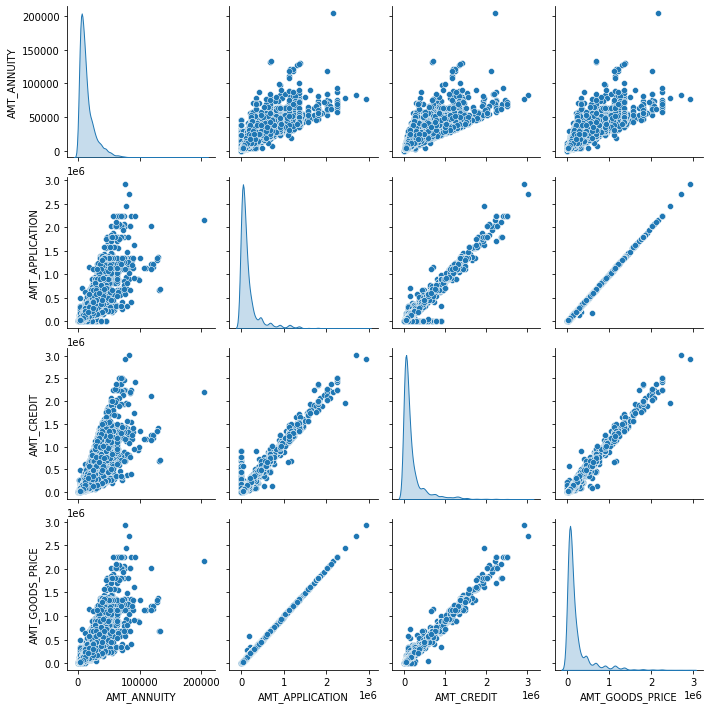

In [80]:
# Using pairplot plotting the relation between correlated highly corelated numeric vriables
sns.pairplot(prev_df[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']], 
             diag_kind = 'kde')
plt.show()

Insights - 

Annuity of previous application has a very high and positive influence over: (Increase of annuity increases below factors)

1. How much credit did client asked on the previous application
2. Final credit amount on the previous application that was approved by the bank
3. Goods price of good that client asked for on the previous application.

Credit amount, client asked on the previous application is highly influenced by the Goods price of good that client has asked for on the previous application

Final credit amount disbursed to the customer previously, after approval is highly influence by the application amount and also the goods price of good that client asked for on the previous application.

# Bivariate Analysis (Categorical - Continuous)

**Contract Status vs Annuity Amount**

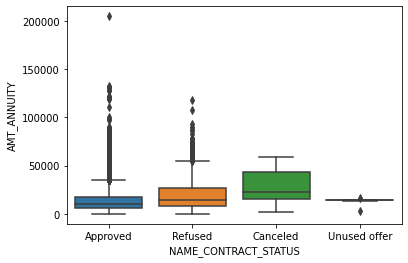

In [81]:
#BOxplot for Contract status and Annuity amount
sns.boxplot(prev_df['NAME_CONTRACT_STATUS'], prev_df['AMT_ANNUITY'])
plt.show()

Insight - 

1. Loan application for people with lower AMT_ANNUITY gets canceled most of the time.
2. Loan applications with too high AMT ANNUITY also got refused more often than others.

**Contract staus vs Credit amount**

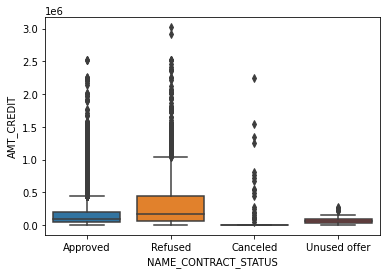

In [82]:
sns.boxplot(prev_df['NAME_CONTRACT_STATUS'], prev_df['AMT_CREDIT'])
plt.show()


We can infer that when the AMT_CREDIT is too low, it get's cancelled/unused most of the time.

# Correlation in the PreviousApplication dataset

In [83]:
#Getting the top 10 correlation PreviousApplication
corr=prev_df.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
88,AMT_GOODS_PRICE,AMT_APPLICATION,0.999888,0.999888
89,AMT_GOODS_PRICE,AMT_CREDIT,0.993329,0.993329
71,AMT_CREDIT,AMT_APPLICATION,0.973665,0.973665
269,DAYS_TERMINATION,DAYS_LAST_DUE,0.939344,0.939344
87,AMT_GOODS_PRICE,AMT_ANNUITY,0.830212,0.830212
70,AMT_CREDIT,AMT_ANNUITY,0.824385,0.824385
53,AMT_APPLICATION,AMT_ANNUITY,0.814771,0.814771
232,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,-0.790642,0.790642
173,CNT_PAYMENT,AMT_APPLICATION,0.686001,0.686001
175,CNT_PAYMENT,AMT_GOODS_PRICE,0.678783,0.678783


# Merging Application_Data and Previous_Application data

In [84]:
df_merged = pd.merge(df, previous_app, how='inner', on='SK_ID_CURR')
df_merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NUM_DOCS,AGE,YEARS_EMPLOYED,IncomeSlab,AGE_GROUP,PREV_AMT_CREDIT,PREV_CONTRACT_STATUS,PREV_REJECT_REASON,PREV_YIELD_GROUP,PREV_DAYS_TERMINATION,PREV_NAME_CONTRACT_TYPE,PREV_AMT_ANNUITY,PREV_AMT_GOODS_PRICE,PREV_NAME_TYPE_SUITE,PREV_WEEKDAY_APPR_PROCESS_START,PREV_HOUR_APPR_PROCESS_START
0,100009,0,Cash loans,F,Y,Y,1,1.710,15.607260,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,1213.0,619,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1562.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,37,8,1.25-1.75,30-40,98239.5,Approved,XAP,low_action,-84.0,Consumer loans,8996.760,98239.5,NaN,SATURDAY,18
1,100035,0,Cash loans,F,N,Y,0,2.925,6.658920,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,5266.0,3787,1,1,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.0124,0.9697,0.0690,0.0417,0.0149,0.0126,0.9697,0.0690,0.0417,0.0155,0.0125,0.9697,0.0690,0.0417,0.0152,block of flats,0.0117,Others,No,0.0,0.0,0.0,0.0,1634.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,41,7,2.75-3.25,40-50,0.0,Refused,HC,XNA,NaN,Cash loans,NaN,NaN,NaN,FRIDAY,14
2,100043,0,Cash loans,F,N,Y,2,1.980,6.411735,23157.0,553500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.018850,63.0,735,1,1,1,1,1,0,Private service staff,4.0,2,2,THURSDAY,13,0,0,0,0,0,0,Other,0.681699,0.754406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2411.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,47,2,1.75-2.25,40-50,33340.5,Approved,XAP,low_normal,-2167.0,Consumer loans,5287.815,35775.0,Family,MONDAY,11
3,100077,0,Cash loans,M,N,Y,0,1.800,12.564000,40657.5,900000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.072508,6105.0,1,1,1,0,1,0,0,Core staff,1.0,1,1,WEDNESDAY,12,0,0,0,0,0,0,Police,0.647348,0.562060,0.1433,0.9811,0.1379,0.3333,0.1367,0.1460,0.9811,0.1379,0.3333,0.1425,0.1447,0.9811,0.1379,0.3333,0.1392,block of flats,0.1114,Panel,No,4.0,0.0,4.0,0.0,295.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,33,1,1.75-2.25,30-40,0.0,Refused,HC,XNA,NaN,Cash loans,NaN,NaN,NaN,WEDNESDAY,14
4,100121,0,Cash loans,M,N,Y,0,1.260,7.871310,26145.0,679500.0,Unaccompanied,Working,Secondary / secondary special,Married,With parents,0.018209,9388.0,347,1,1,1,1,1,0,Low-skill Laborers,2.0,3,3,FRIDAY,7,0,0,0,0,0,0,Business Entity Type 2,0.586150,0.581484,NaN,0.9781,0.2069,0.1667,0.0987,NaN,0.9782,0.2069,0.1667,0.1028,NaN,0.97

In [85]:
# Structure after merging
df_merged.shape

(204, 86)

# Univariate Analysis(Categorical)

**Target**

In [86]:
df_merged.TARGET.value_counts(normalize=True)

0    0.906863
1    0.093137
Name: TARGET, dtype: float64

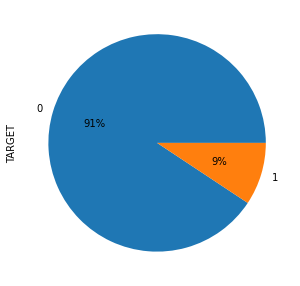

In [87]:
# pie chart of target after merging
plt.figure(figsize=(10,5))
df_merged.TARGET.value_counts(normalize=True).plot.pie(autopct='%1.0f%%')
plt.show()

**Gender**

In [88]:
# analyse gender distribution in data
df_merged.CODE_GENDER.value_counts(normalize = True)*100

F    64.705882
M    35.294118
Name: CODE_GENDER, dtype: float64

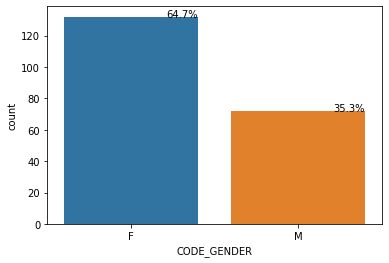

In [89]:
# Countplot for gender columns
ax = sns.countplot(x = 'CODE_GENDER', data= df_merged)
percent_calc(df_merged,ax)
plt.show()

Insights-

Mostly loan applications are from females.

**Education**

In [90]:
df_merged.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    149
Higher education                  49
Incomplete higher                  4
Lower secondary                    2
Name: NAME_EDUCATION_TYPE, dtype: int64

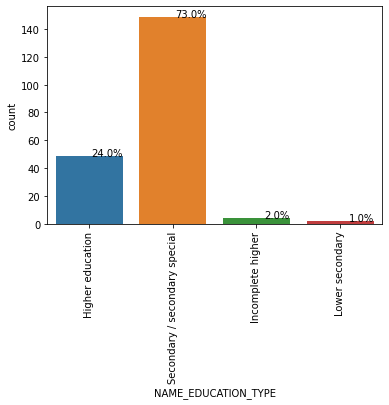

In [91]:
# Countplot for Education types
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE', data= df_merged)
percent_calc(df_merged,ax)
plt.xticks(rotation=90)
plt.show()

Insights - 

1. Secondary Students apply more for loans.
2. Academic Degree students didn't apply for loans

**Family Status**

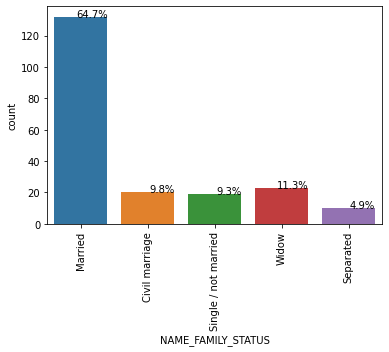

In [92]:
# Countplot for Education types
ax = sns.countplot(x = 'NAME_FAMILY_STATUS', data= df_merged)
percent_calc(df_merged,ax)
plt.xticks(rotation=90)
plt.show()

Insight-

Married people take more loans

**Occupation Type**

In [93]:
df_merged.OCCUPATION_TYPE.value_counts(normalize=True)*100

Laborers                 21.276596
Sales staff              17.730496
Core staff               14.893617
Managers                 12.765957
Drivers                  10.638298
High skill tech staff     6.382979
Cleaning staff            3.546099
Medicine staff            2.836879
Accountants               2.836879
Security staff            2.127660
Private service staff     1.418440
Cooking staff             1.418440
Low-skill Laborers        1.418440
Waiters/barmen staff      0.709220
Name: OCCUPATION_TYPE, dtype: float64

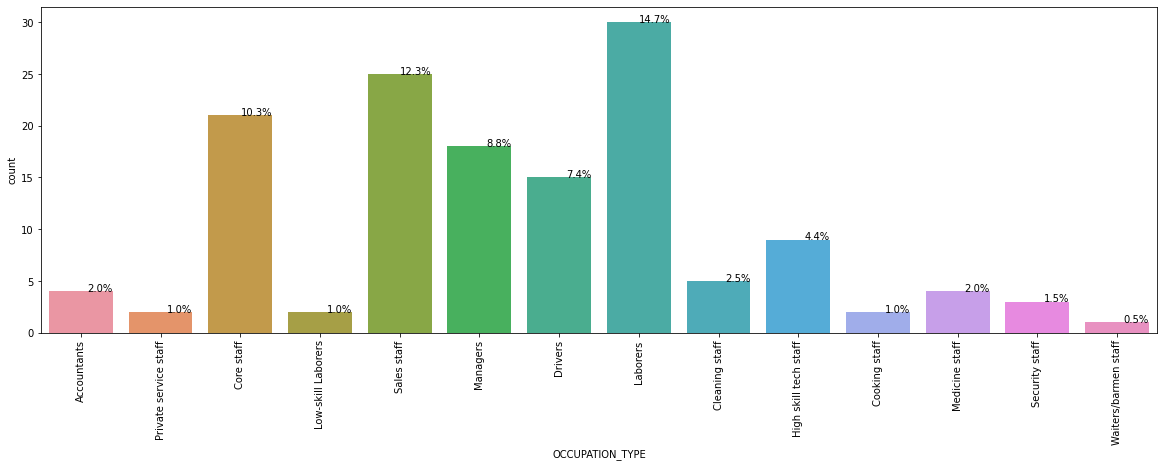

In [94]:
# Countplot for Education types
plt.figure(figsize=(20,6))
ax = sns.countplot(x = 'OCCUPATION_TYPE', data= df_merged)
percent_calc(df_merged,ax)
plt.xticks(rotation=90)
plt.show()

Insight - 

Laborers take more loans

**Age Group**

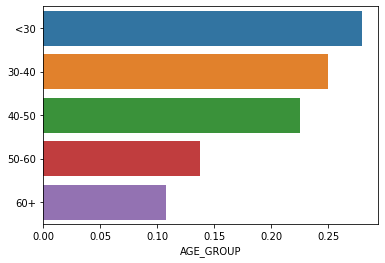

In [95]:
#  plot a bar graph based on age buckets
sns.barplot(df_merged.AGE_GROUP.value_counts(normalize=True), age_buckets)
plt.show()

Insight - 

Age group <30 people apply more for loans

**Contract Status from previos applications**

In [96]:
df_merged.PREV_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved        70.098039
Refused         14.705882
Canceled        12.745098
Unused offer     2.450980
Name: PREV_CONTRACT_STATUS, dtype: float64

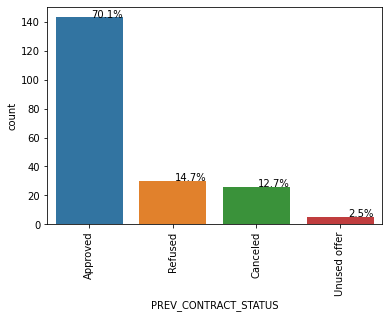

In [97]:
# Countplot for Education types
ax = sns.countplot(x = 'PREV_CONTRACT_STATUS', data= df_merged)
percent_calc(df_merged,ax)
plt.xticks(rotation=90)
plt.show()

Insight - 

There was large amount of applications that was approved.

# Bivariate Analysis (Numeric - Categorical) 
**Total Income vs Occupation type**

In [98]:
df_merged.groupby('OCCUPATION_TYPE').AMT_INCOME_TOTAL.aggregate(['mean', 'median'])

,mean,median
OCCUPATION_TYPE,,
Accountants,1.327500,1.23750
Cleaning staff,1.035000,0.99000
Cooking staff,1.462500,1.46250
Core staff,1.574143,1.26000
Drivers,2.265000,1.80000
High skill tech staff,1.490000,1.35000
Laborers,1.645950,1.42425
Low-skill Laborers,1.642500,1.64250
Managers,2.900000,2.76750


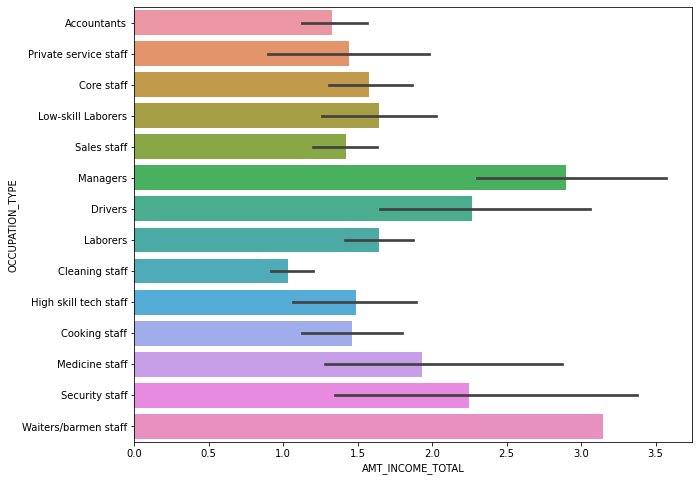

In [99]:
# plot bar graph 
plt.figure(figsize=(10,8))
sns.barplot(df_merged.AMT_INCOME_TOTAL, df_merged.OCCUPATION_TYPE)
plt.show()

Insights -

Managers have high income

**Marital status vs Amount requested for loan**

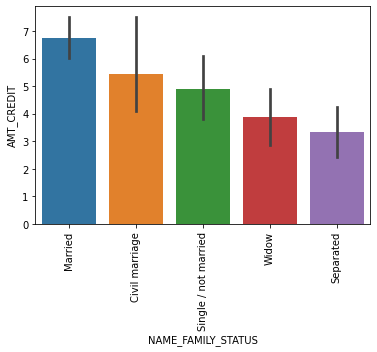

In [100]:
# Marital Status of the applicant vs Amount requested for Loan
sns.barplot(df_merged.NAME_FAMILY_STATUS, df_merged.AMT_CREDIT)
plt.xticks(rotation = 90)
plt.show()

Insights -

Married people apply for higher credit amount than others.

**Amount of loan vs target**

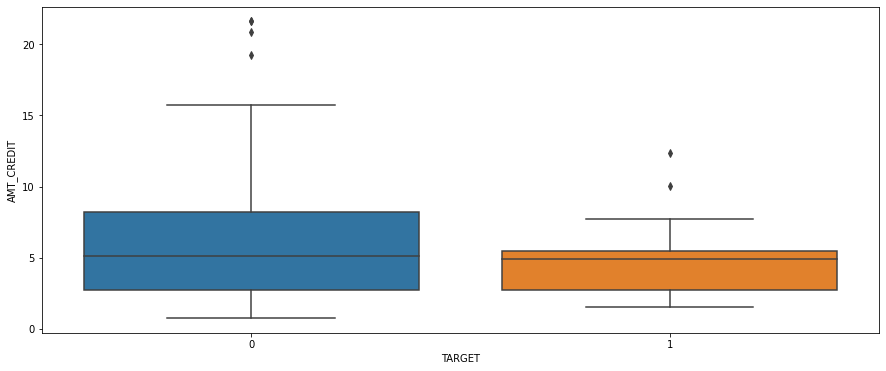

In [101]:
plt.figure(figsize=[15,6])
sns.boxplot(x=df_merged.TARGET, y=df_merged.AMT_CREDIT)
plt.show()

Insights -

Application for higher credit amount are mostly non-defaulters. But median value is almost same for defaulters and non-defualters

**Income Amount vs target**

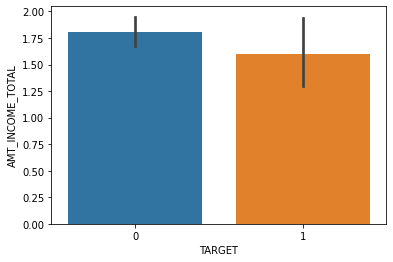

In [102]:
sns.barplot(x=df_merged.TARGET, y=df_merged.AMT_INCOME_TOTAL)
plt.show()

# Bivariate Analysis  (Categorical-Continuous)

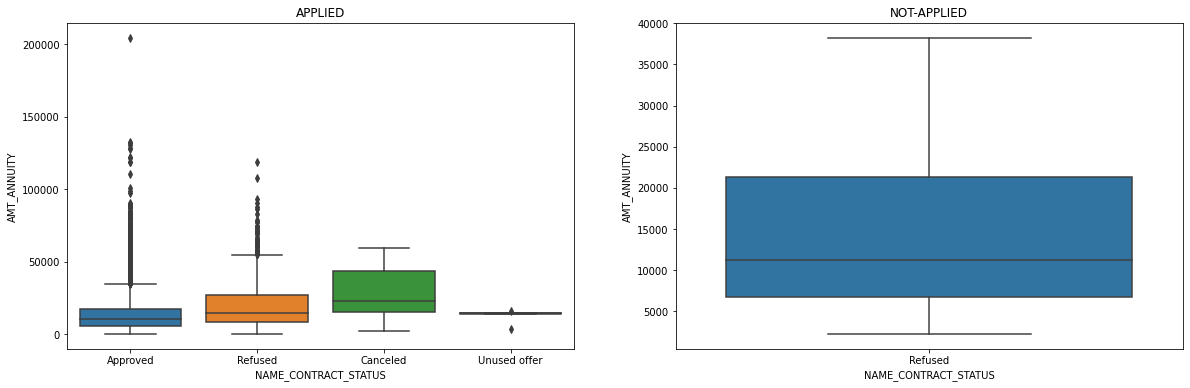

In [103]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('APPLIED')
sns.boxplot(x='NAME_CONTRACT_STATUS',y='AMT_ANNUITY',data=prev_df_applied)
plt.subplot(1,2,2)
plt.title('NOT-APPLIED')

sns.boxplot(x='NAME_CONTRACT_STATUS',y='AMT_ANNUITY',data=prev_df_notApplied)
plt.show()

#Bivariate Analysis  (Categorical-Categorical)

**NAME_FAMILY_STATUS vs target**

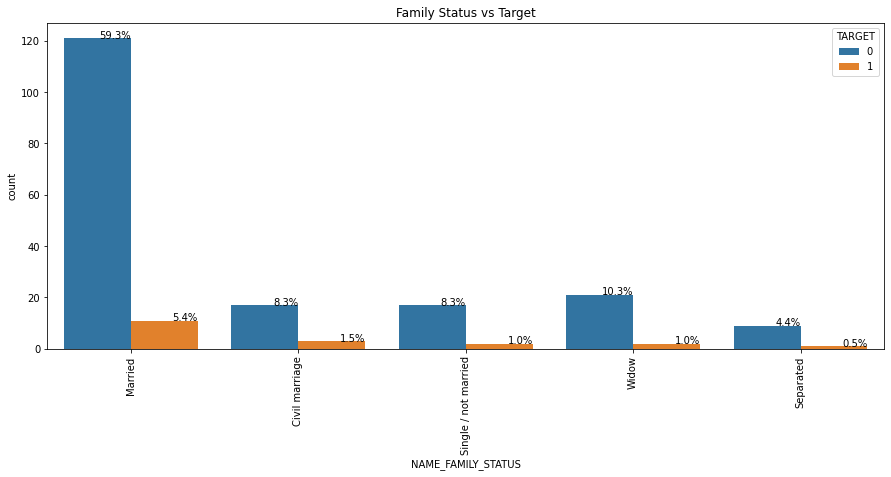

In [104]:
# Countplot for family status and target
plt.figure(figsize=[15,6])
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',hue='TARGET', data = df_merged)
plt.title('Family Status vs Target')
percent_calc(df_merged,ax)
plt.xticks(rotation=90)
plt.show()

Insights - 

Married people are mostly non-defaulters

**OCCUPATION_TYPE vs target**

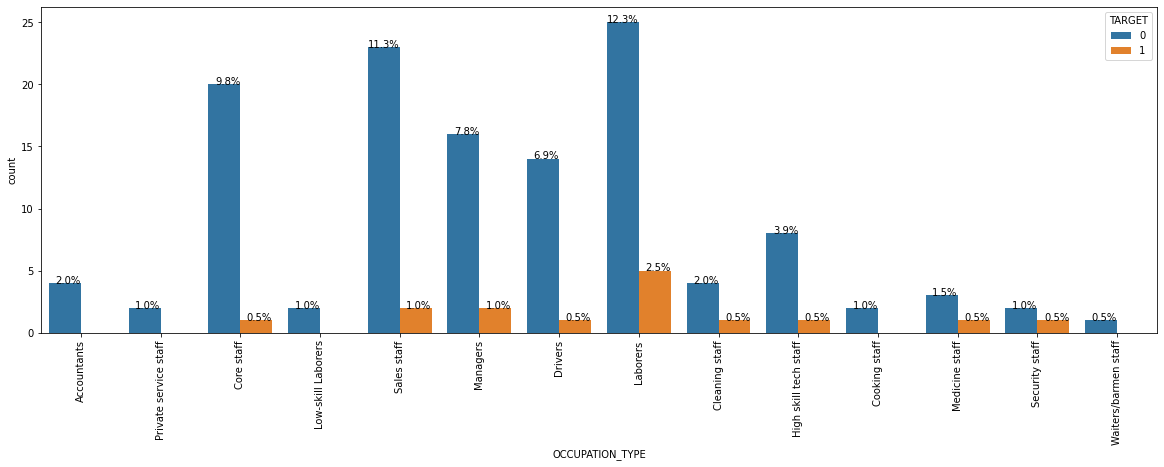

In [105]:
# Countplot for Occupation and Target
plt.figure(figsize=[20,6])
ax = sns.countplot(x = 'OCCUPATION_TYPE',hue='TARGET', data = df_merged)
percent_calc(df_merged,ax)
plt.xticks(rotation=90)
plt.show()

Insights - 

All Occupation types have more percentange of non-defaulters. Mostly Laborers are in non-defaulter category.

**PREV_CONTRACT_STATUS vs target**

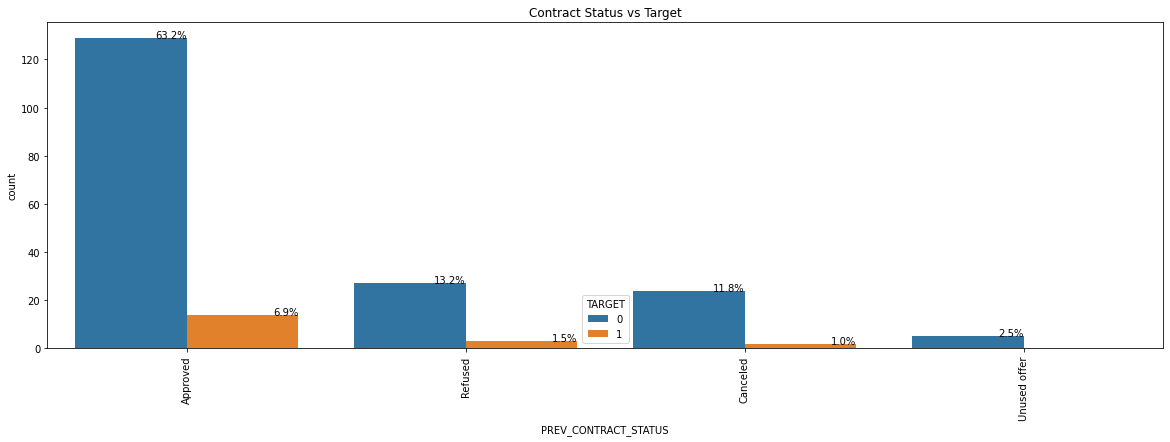

In [106]:
# Countplot for Previous Contract status and target
plt.figure(figsize=[20,6])
ax = sns.countplot(x = 'PREV_CONTRACT_STATUS',hue='TARGET', data = df_merged)
plt.title('Contract Status vs Target')
percent_calc(df_merged,ax)
plt.xticks(rotation=90)
plt.show()

Insights - 

We can see that the people who were approved for a loan earlier, defaulted less often.

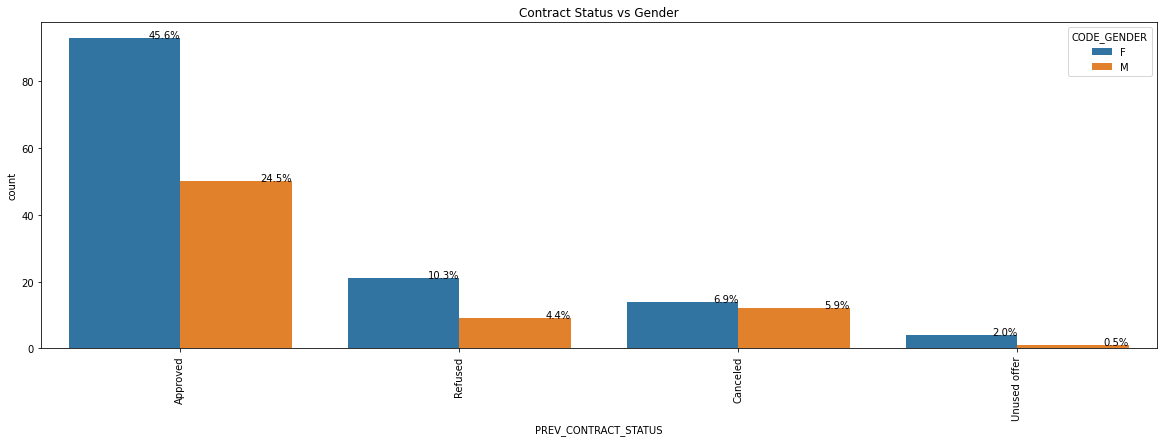

In [107]:
# Countplot for Previous Contract status and target
plt.figure(figsize=[20,6])
ax = sns.countplot(x = 'PREV_CONTRACT_STATUS',hue='CODE_GENDER', data = df_merged)
plt.title('Contract Status vs Gender')
percent_calc(df_merged,ax)
plt.xticks(rotation=90)
plt.show()

Insight - 

Female have lesser chances of default compared to males. The bank adds more weightage to female while approving a loan amount

**PREV_REJECT_REASON vs target**

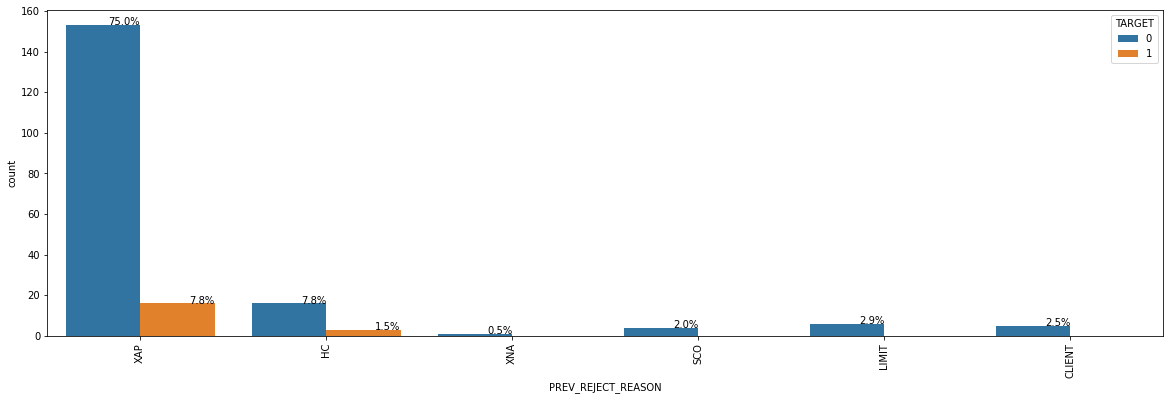

In [108]:
# Countplot for Previous Contract status and target
plt.figure(figsize=[20,6])
ax = sns.countplot(x = 'PREV_REJECT_REASON',hue='TARGET', data = df_merged)
percent_calc(df_merged,ax)
plt.xticks(rotation=90)
plt.show()

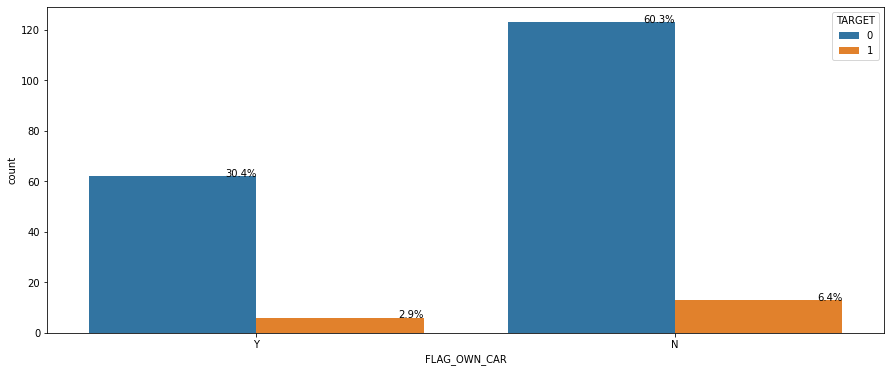

In [109]:
# Countplot for Previous Contract status and target
plt.figure(figsize=[15,6])
ax = sns.countplot(x = 'FLAG_OWN_CAR',hue='TARGET', data = df_merged)
percent_calc(df_merged,ax)
plt.show()

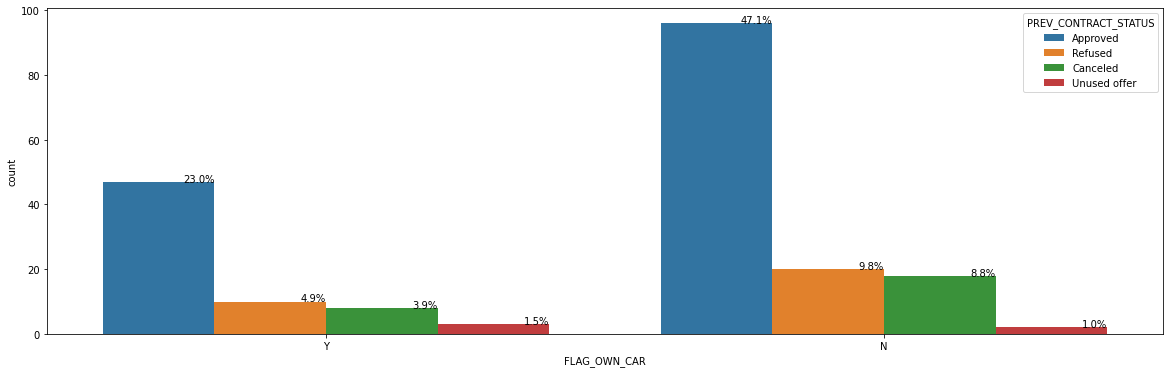

In [110]:
# Countplot for Previous Contract status and target
plt.figure(figsize=[20,6])
ax = sns.countplot(x = 'FLAG_OWN_CAR',hue='PREV_CONTRACT_STATUS', data = df_merged)
percent_calc(df_merged,ax)
plt.show()

We see that car ownership didn't effect application approval or rejection. But we saw earlier that the people who didn't have car had lesser chances of default.